In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Read in the data from the wholesale_customers_data.csv file contained within the datasets folder.
Store the Channel column in a separate variable, and then drop the Region and Channel columns from the dataframe. Channel will act as our labels to tell us what class of customer each datapoint actually is, in case we want to check the accuracy of our clustering.

In [2]:
df = pd.read_csv('data.csv')
ch = df['Channel']
df = df.drop(['Channel', 'Region'], axis=1)

Scale the data, fit a k-means object to it, and then visualize the data and the clustering.

In [4]:
def describe_con_mat(m):
    tn, tp, fp, fn = m[0][0], m[1][1], m[0][1], m[1][0]
    accuracy = (tp + tn) / sum(sum(m))
    print('Accuracy = ', accuracy)
    recall = (tp) / (tp + fn)
    print('Recall = ', recall)
    precision = (tp) / (tp + fp)
    print('Precision = ', precision)
    specificity = (tn) / (tn + fp)
    print('Specificity = ', specificity)
    f1_score = (2 * precision * recall) / (precision + recall)
    print('F1 score = ', f1_score)


In [5]:
k_means = KMeans(n_clusters=2)

In [6]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(df)
X_te_scaled = scaler.transform(df)

In [7]:
k_means.fit(X_tr_scaled)
y_pred = k_means.predict(X_te_scaled) + 1
m = confusion_matrix(y_pred, ch)
print(m)
describe_con_mat(m)

[[296 106]
 [  2  36]]
Accuracy =  0.7545454545454545
Recall =  0.9473684210526315
Precision =  0.2535211267605634
Specificity =  0.736318407960199
F1 score =  0.4


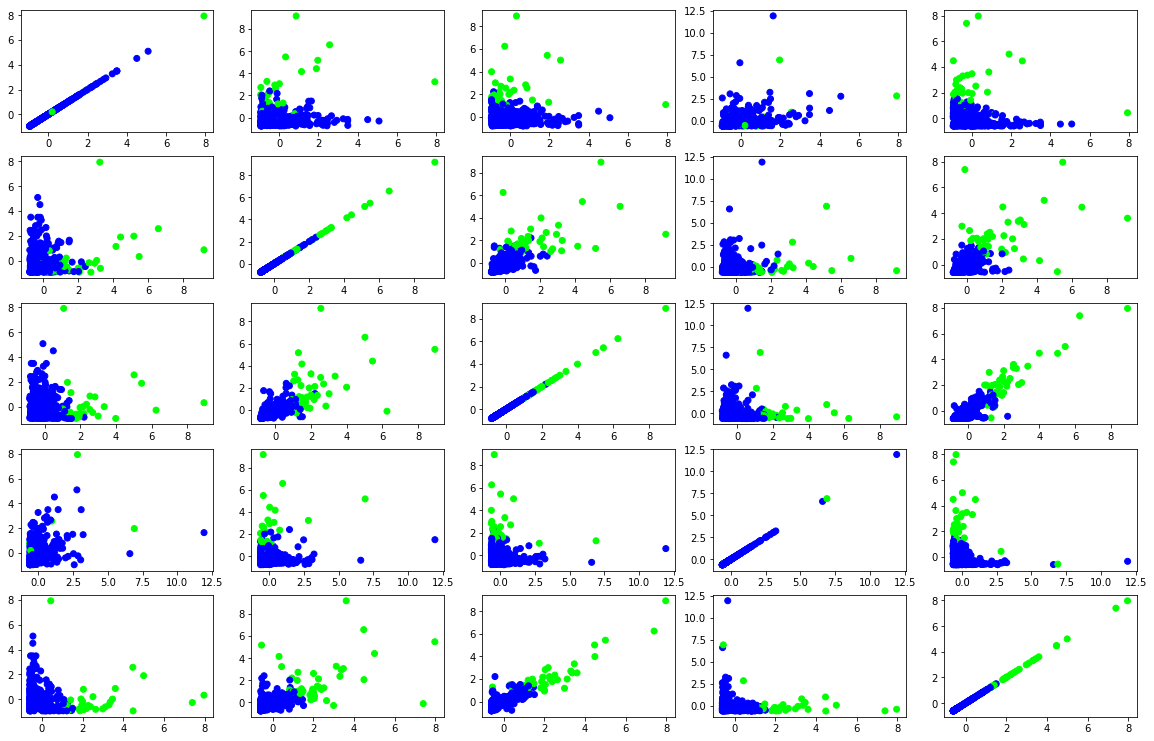

In [8]:
fig, axs = plt.subplots(5,5, figsize=(20, 13))
for i in range(25):
    axs[i//5][i%5].scatter(X_te_scaled[:, i//5], X_te_scaled[:,i%5], c=y_pred, cmap='brg')

Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.

In [9]:
pca = PCA(n_components=2)
X_tr_sc_PCA = pca.fit_transform(X_tr_scaled)
X_te_sc_PCA = pca.transform(X_te_scaled)

In [10]:
k_means.fit(X_tr_sc_PCA)
y_pred = k_means.predict(X_te_sc_PCA ) + 1
m = confusion_matrix(y_pred, ch)
print(m)
describe_con_mat(m)

[[296 105]
 [  2  37]]
Accuracy =  0.7568181818181818
Recall =  0.9487179487179487
Precision =  0.2605633802816901
Specificity =  0.7381546134663342
F1 score =  0.4088397790055248


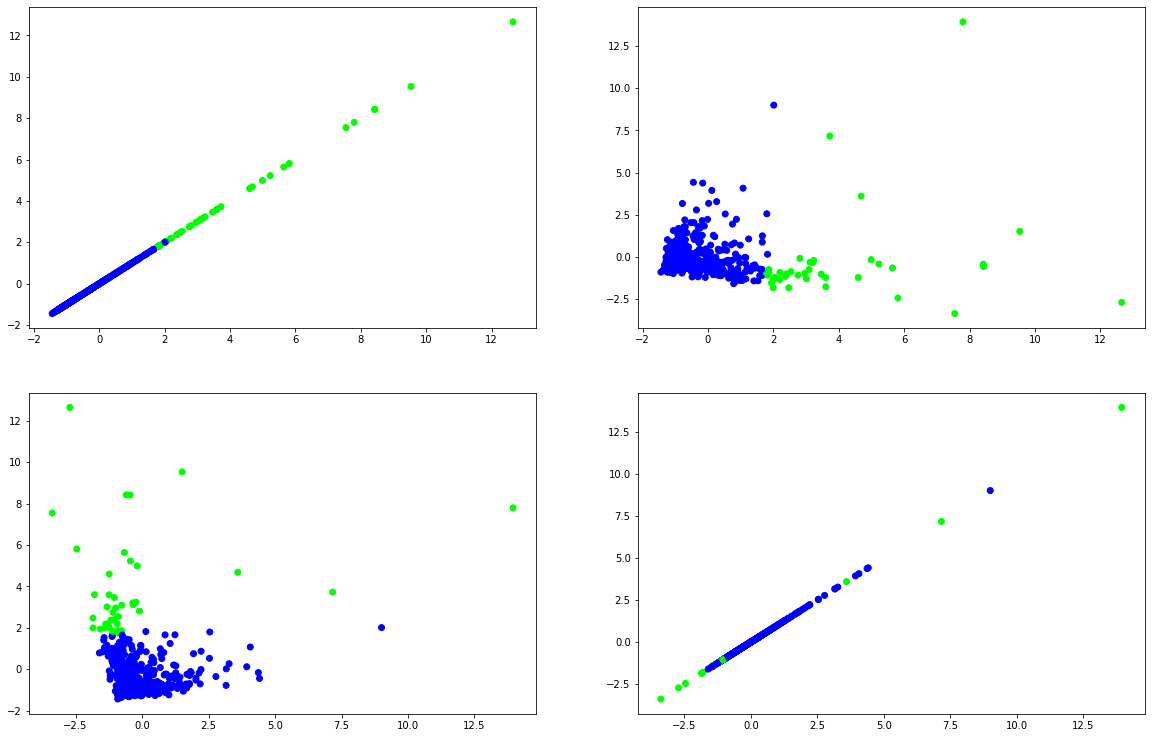

In [11]:
fig, axs = plt.subplots(2,2, figsize=(20, 13))
for i in range(4):
    axs[i//2][i%2].scatter(X_te_sc_PCA[:, i//2], X_te_sc_PCA[:,i%2], c=y_pred, cmap='brg')

Well they got the exact same scores, so PCA did not seem to help or hurt.